# Kaggle [Spaceship-Titanic](https://www.kaggle.com/competitions/spaceship-titanic) challenge

File di output non corretto in quanto non appaiono tutte le rows. Il problema è dovuto al fatto che la pipeline droppa le righe vuote, non solo per il dataset di train ma anche per quello test. Dunque riguardare il codice, evitando di droppare rows. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/spaceship-titanic/train.csv')
test = pd.read_csv('../data/spaceship-titanic/test.csv')

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   4277 non-null   object
 1   HomePlanet    4190 non-null   object
 2   CryoSleep     4184 non-null   object
 3   Cabin         4177 non-null   object
 4   Destination   4185 non-null   object
 5   Age           4277 non-null   int64 
 6   VIP           4184 non-null   object
 7   RoomService   4277 non-null   int64 
 8   FoodCourt     4277 non-null   int64 
 9   ShoppingMall  4277 non-null   int64 
 10  Spa           4277 non-null   int64 
 11  VRDeck        4277 non-null   int64 
 12  Name          4183 non-null   object
dtypes: int64(6), object(7)
memory usage: 434.5+ KB


In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

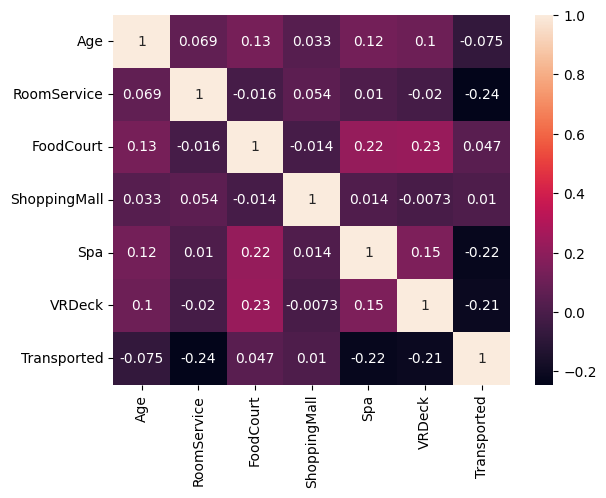

In [6]:
sns.heatmap(train.corr(numeric_only=True), annot=True)

Non noto particolare correlazioni tra i dati numerici. 

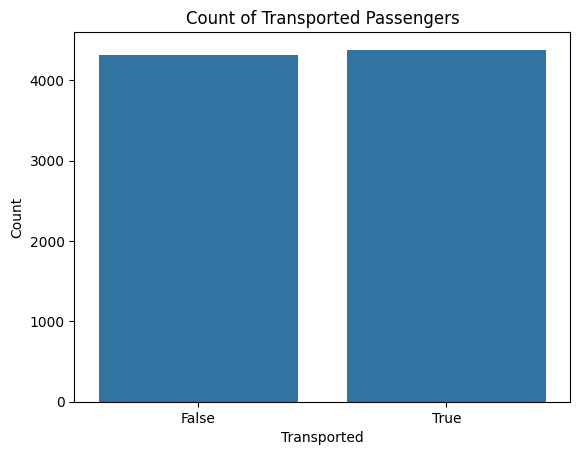

In [7]:
sns.countplot(x='Transported', data=train)
plt.xlabel('Transported')
plt.ylabel('Count')
plt.title('Count of Transported Passengers')
plt.show()


<Axes: xlabel='Transported', ylabel='Age'>

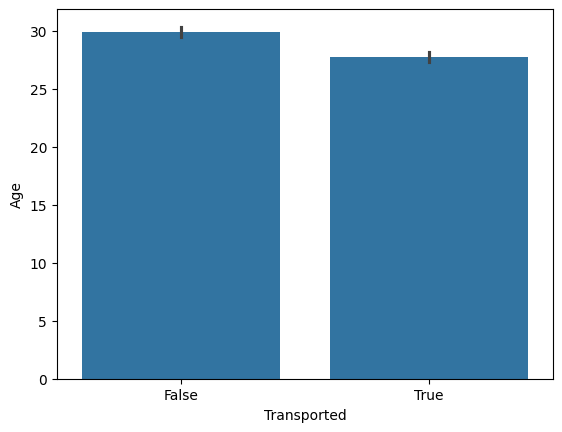

In [8]:
sns.barplot(data=train, x='Transported', y='Age')

<Axes: xlabel='HomePlanet', ylabel='count'>

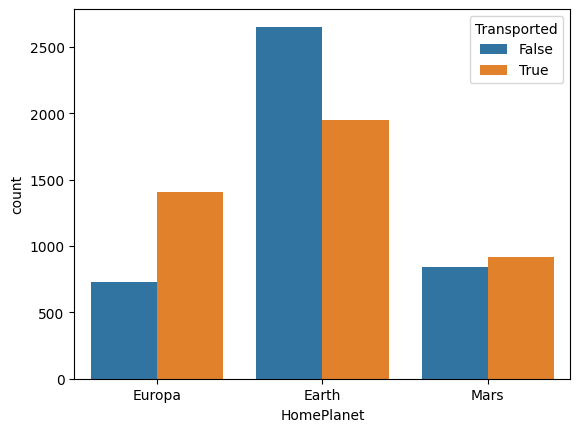

In [9]:
sns.countplot(x='HomePlanet', data=train, hue='Transported')

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class MissingDataImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
        for column in columns:
            imputer = SimpleImputer(strategy='median')
            X[column] = imputer.fit_transform(X[[column]])
            X[column] = X[column].astype(int)

        # Age imputer
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        X['Age'] = X['Age'].astype(int)

        return X

In [11]:
class NADropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.dropna(subset=['Destination', 'Cabin', 'CryoSleep', 'HomePlanet', 'VIP'])
        return X

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        vip_encoder = LabelEncoder()
        cryo_encoder = LabelEncoder()
        transported_encoder = LabelEncoder()
        homeplanet_encoder = OneHotEncoder()
        destination_encoder = OneHotEncoder()

        X['VIP'] = vip_encoder.fit_transform(X['VIP'])
        X['CryoSleep'] = cryo_encoder.fit_transform(X['CryoSleep'])
        if 'Transported' in X.columns:
            X['Transported'] = vip_encoder.fit_transform(X['Transported'])


        homeplanet_encoded = homeplanet_encoder.fit_transform(X[['HomePlanet']])
        homeplanet_encoded_df = pd.DataFrame(homeplanet_encoded.toarray(), columns=homeplanet_encoder.get_feature_names_out(['HomePlanet']))
        homeplanet_encoded_df.index = X.index  # Ensure the indices match
        X = X.join(homeplanet_encoded_df)
        X = X.drop(columns=['HomePlanet'])

        destination_encoded = destination_encoder.fit_transform(X[['Destination']])
        destination_encoded_df = pd.DataFrame(destination_encoded.toarray(), columns=destination_encoder.get_feature_names_out(['Destination']))
        destination_encoded_df.index = X.index
        X = X.join(destination_encoded_df)
        X = X.drop(columns=['Destination'])
    
        return X


In [13]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.drop(columns=['Name', 'Cabin'], axis=1)
        return X

In [14]:
class AddTransportedColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if 'Transported' not in X.columns:
            X['Transported'] = None  # Aggiungi la colonna con valori mancanti (o un altro valore placeholder)
        return X

In [15]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('missingdataimputer', MissingDataImputer()), # 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age'
                     ('nadropper', NADropper()),
                     ('featureencoder', FeatureEncoder()), # 'VIP', 'CryoSleep'
                     ('featuredropper', FeatureDropper())]) # 'Name'

In [16]:
train_pipelined = pipeline.fit_transform(train)
test_pipelined = pipeline.fit_transform(test)

/var/folders/8h/b6sjd9l522v8k4p6t77m8fpm0000gn/T/ipykernel_35212/3234019493.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['VIP'] = vip_encoder.fit_transform(X['VIP'])
/var/folders/8h/b6sjd9l522v8k4p6t77m8fpm0000gn/T/ipykernel_35212/3234019493.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CryoSleep'] = cryo_encoder.fit_transform(X['CryoSleep'])
/var/folders/8h/b6sjd9l522v8k4p6t77m8fpm0000gn/T/ipykernel_35212/3234019493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [35]:
test_pipelined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3834 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                3834 non-null   object 
 1   CryoSleep                  3834 non-null   int64  
 2   Age                        3834 non-null   int64  
 3   VIP                        3834 non-null   int64  
 4   RoomService                3834 non-null   int64  
 5   FoodCourt                  3834 non-null   int64  
 6   ShoppingMall               3834 non-null   int64  
 7   Spa                        3834 non-null   int64  
 8   VRDeck                     3834 non-null   int64  
 9   HomePlanet_Earth           3834 non-null   float64
 10  HomePlanet_Europa          3834 non-null   float64
 11  HomePlanet_Mars            3834 non-null   float64
 12  Destination_55 Cancri e    3834 non-null   float64
 13  Destination_PSO J318.5-22  3834 non-null   float64
 1

In [17]:
train_pipelined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7736 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7736 non-null   object 
 1   CryoSleep                  7736 non-null   int64  
 2   Age                        7736 non-null   int64  
 3   VIP                        7736 non-null   int64  
 4   RoomService                7736 non-null   int64  
 5   FoodCourt                  7736 non-null   int64  
 6   ShoppingMall               7736 non-null   int64  
 7   Spa                        7736 non-null   int64  
 8   VRDeck                     7736 non-null   int64  
 9   Transported                7736 non-null   int64  
 10  HomePlanet_Earth           7736 non-null   float64
 11  HomePlanet_Europa          7736 non-null   float64
 12  HomePlanet_Mars            7736 non-null   float64
 13  Destination_55 Cancri e    7736 non-null   float64
 1

In [18]:
train_pipelined.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0002_01,0,24,0,109,9,25,549,44,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0003_01,0,58,1,43,3576,0,6715,49,0,0.0,1.0,0.0,0.0,0.0,1.0
3,0003_02,0,33,0,0,1283,371,3329,193,0,0.0,1.0,0.0,0.0,0.0,1.0
4,0004_01,0,16,0,303,70,151,565,2,1,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True


In [20]:
test_pipelined.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,1,27,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
1,0018_01,0,19,0,0,9,0,2823,0,1.0,0.0,0.0,0.0,0.0,1.0
2,0019_01,1,31,0,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0
3,0021_01,0,38,0,0,6652,0,181,585,0.0,1.0,0.0,0.0,0.0,1.0
4,0023_01,0,20,0,10,0,635,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
X_train = train_pipelined.drop(columns='Transported')
y_train = train_pipelined['Transported']

X_test = test_pipelined

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Creazione del modello
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestramento del modello
model.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = model.predict(X_test)

In [26]:
X_test

array([[-1.73251516,  1.34196458, -0.12709996, ..., -0.51847925,
        -0.32157259,  0.66336986],
       [-1.73064119, -0.74517615, -0.68437675, ..., -0.51847925,
        -0.32157259,  0.66336986],
       [-1.7302664 ,  1.34196458,  0.15153844, ...,  1.9287175 ,
        -0.32157259, -1.50745469],
       ...,
       [ 1.73545302,  1.34196458,  0.36051724, ..., -0.51847925,
        -0.32157259,  0.66336986],
       [ 1.73732324,  1.34196458, -0.05744036, ...,  1.9287175 ,
        -0.32157259, -1.50745469],
       [ 1.739572  ,  1.34196458,  0.98745364, ..., -0.51847925,
         3.10971781, -1.50745469]])

In [28]:
ids = test_pipelined['PassengerId']
ids

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4270    9265_01
4271    9266_01
4272    9266_02
4274    9271_01
4276    9277_01
Name: PassengerId, Length: 3834, dtype: object

In [31]:
df = pd.DataFrame({'PassengerId': ids, 'Transported': y_pred.astype(bool)})
df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [33]:
df.to_csv('submission.csv', index=False)